In [10]:
conda install openpyxl

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\yamin\miniconda3\envs\msc

  added / updated specs:
    - openpyxl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    et_xmlfile-1.0.1           |          py_1001          12 KB
    jdcal-1.4.1                |             py_0          11 KB
    openpyxl-3.0.7             |     pyhd3eb1b0_0         159 KB
    ------------------------------------------------------------
                                           Total:         183 KB

The following NEW packages will be INSTALLED:

  et_xmlfile         pkgs/main/noarch::et_xmlfile-1.0.1-py_1001
  jdcal              pkgs/main/noarch::jdcal-1.4.1-py_0
  openpyxl           pkgs/main/noarch::openpyxl-3.0.7-pyhd3eb1b0_0




jdcal-1.4.1          | 11 KB     |            |   0% 
jdcal-1.4

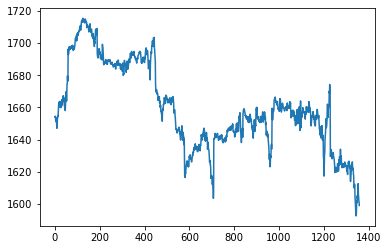

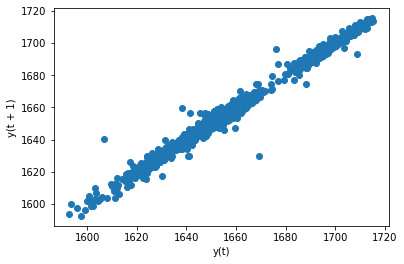

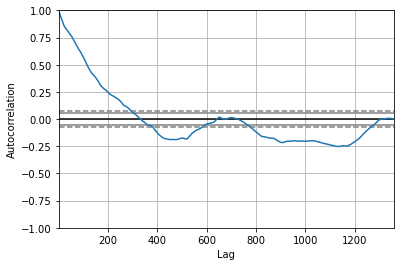

In [1]:
# https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as pdr
from pandas.plotting import lag_plot

from pandas.plotting import autocorrelation_plot

import statsmodels


df_amzn = pandas.read_excel('amzn.xlsx')

close_amzn = df_amzn['Close']


plt.plot(close_amzn)
plt.show()

lag_plot(close_amzn)
plt.show()

autocorrelation_plot(close_amzn)
plt.show()


Lag: 22
Coefficients: const        7.720436
L1.Close     0.983638
L2.Close    -0.064284
L3.Close     0.082178
L4.Close    -0.000041
L5.Close     0.055697
L6.Close    -0.077048
L7.Close     0.002999
L8.Close     0.000678
L9.Close    -0.006609
L10.Close    0.010113
L11.Close    0.040629
L12.Close   -0.018567
L13.Close   -0.080558
L14.Close    0.104468
L15.Close   -0.027076
L16.Close   -0.040876
L17.Close   -0.006285
L18.Close    0.040661
L19.Close   -0.029924
L20.Close    0.014099
L21.Close   -0.011389
L22.Close    0.022854
dtype: float64
Test MSE: 919.377


C:\Users\yamin\miniconda3\envs\msc\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWa

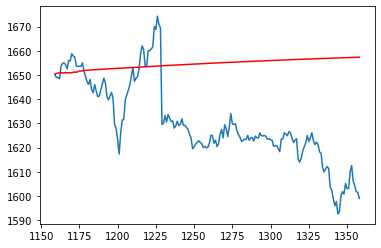

In [2]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# split dataset
X = close_amzn
train, test = X[1:len(X)-200], X[len(X)-200:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

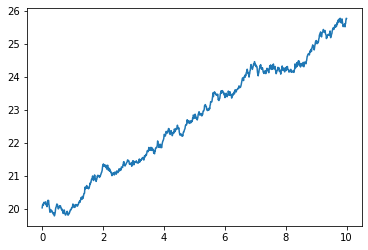

C:\Users\yamin\miniconda3\envs\msc\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWa

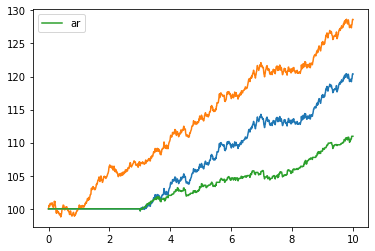

In [3]:
#SCENARIO 1

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

T = 10
mu = 0.01
sigma = 0.02
S0 = 20
dt = 0.01
N = round(T/dt)
t = np.linspace(0, T, N)
W = np.random.standard_normal(size = N) 
W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
X = (mu-0.5*sigma**2)*t + sigma*W 
S = S0*np.exp(X) ### geometric brownian motion ###
plt.plot(t, S)
plt.show()


#TRADING: TREND FOLLOWING 
    
time_window = 3*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] < x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] > x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]
        
tf_strategy = [a*b for a,b in zip(w,S)]+ cash

    
#TRADING: MEAN REVERSION 
    
time_window = 3*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] > x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] < x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]

mr_strategy = [a*b for a,b in zip(w,S)]+ cash

#TRADING: AR 
    
time_window = 3*int(1/dt)
cumsum = [0]

ar_prediction = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ar_prediction[i] = x
    if i>=time_window:
        X = S[0:i]
        train = X
        # train autoregression
        model = AR(train)
        model_fit = model.fit()
        predictions = model_fit.predict(start=len(train), end=len(train), dynamic=False)
        ar_prediction[i] = predictions[0]
    
    if ar_prediction[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ar_prediction[i] > x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ar_prediction[i] < x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]

ar_strategy = [a*b for a,b in zip(w,S)]+ cash


plt.plot(t, tf_strategy)
plt.plot(t, cash[0]*S/S[0])
#plt.plot(t, mr_strategy)
plt.plot(t, ar_strategy, label='ar')
plt.legend()
plt.show()

In [4]:
predictions[0]

25.744519554414108

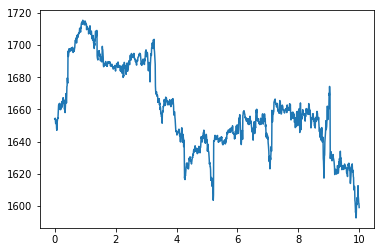

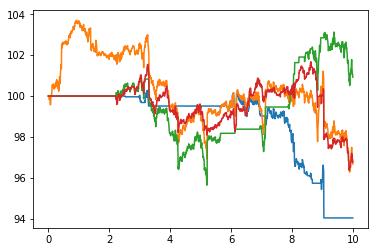

In [20]:
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as pdr
from pandas.plotting import lag_plot

from pandas.plotting import autocorrelation_plot

import statsmodels


df_amzn = pandas.read_excel('amzn.xlsx')

close_amzn = df_amzn['Close']


T = 10
mu = 0.01
sigma = 0.02
S0 = 20
dt = 0.01
N = len(close_amzn)
t = np.linspace(0, T, N)


S = close_amzn
plt.plot(t, S)
plt.show()


#TRADING: TREND FOLLOWING 
    
time_window = 3*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] < x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] > x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]
        
tf_strategy = [a*b for a,b in zip(w,S)]+ cash

    
#TRADING: MEAN REVERSION 
    
time_window = 3*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] > x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] < x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]

mr_strategy = [a*b for a,b in zip(w,S)]+ cash

#TRADING: AR 
    
time_window = 3*int(1/dt)
cumsum = [0]

ar_prediction = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ar_prediction[i] = x
    if i>=time_window:
        X = S[0:i]
        train = X
        # train autoregression
        model = AR(train)
        model_fit = model.fit()
        predictions = model_fit.predict(start=len(train), end=len(train), dynamic=False)
        ar_prediction[i] = predictions[len(train)]
    
    if ar_prediction[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ar_prediction[i] > x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ar_prediction[i] < x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]

ar_strategy = [a*b for a,b in zip(w,S)]+ cash


plt.plot(t, tf_strategy)
plt.plot(t, cash[0]*S/S[0])
plt.plot(t, mr_strategy)
plt.plot(t, ar_strategy)
plt.show()